# Store Sales - Time Series Forecasting Candelo-Zuluaga Version 1
## Use machine learning to predict grocery sales

## Description
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview
### Goal of the competition 
In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

Specifically, you'll build a model that more accurately predicts the unit sales for thousands of items sold at different Favorita stores. You'll practice your machine learning skills with an approachable training dataset of dates, store, and item information, promotions, and unit sales.

### Context 
Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.

### Potential Impact
If successful, you'll have flexed some new skills in a real world example. For grocery stores, more accurate forecasting can decrease food waste related to overstocking and improve customer satisfaction. The results of this ongoing competition, over time, might even ensure your local store has exactly what you need the next time you shop.

### Evaluation
The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as:
1n∑i=1n(log(1+y^i)−log(1+yi))2−−−−−−−−−−−−−−−−−−−−−−−−−−√
where:

n
 is the total number of instances,
y^i
 is the predicted value of the target for instance (i),
yi
 is the actual value of the target for instance (i), and,
log
 is the natural logarithm.

### Submission File
For each id in the test set, you must predict a value for the sales variable. The file should contain a header and have the following format:

`id,sales`

`3000888,0.0`

`3000889,0.0`

etc.

## Data
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

### Dataset Description
In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

### File Descriptions and Data Field Information
### train.csv
* The training data, comprising time series of features `store_nbr`, `family`, and `onpromotion` as well as the target sales.
* `store_nbr` identifies the store at which the products are sold.
* `family` identifies the type of product sold.
* `sales` gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
* `onpromotion` gives the total number of items in a product family that were being promoted at a store at a given date.

### test.csv
* The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
* The dates in the test data are for the 15 days after the last date in the training data.

### sample_submission.csv
* A sample submission file in the correct format.

### stores.csv 
* Store metadata, including city, state, type and cluster. 
* cluster is a grouping of similar stores.

### oil.csv
* Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

### holidays_events.csv
* Holidays and Events, with metadata
* NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
* Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
## Additional Notes
* Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
* A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [1]:
# Import Basic Tools to start working
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import sklearn as sck 

## Importing train.csv
* `Objective:` To analyze the data. 
* Enrich the data if needed with the complementary files.

In [2]:
Train_Data = pd.read_csv('DATA/train.csv')
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


Looking at the data, it is important to transform the date into official number to allow the model to use it properly and to convert 'family' into numerical values, so it is possible to be trained by a model. 

In [3]:
Train_Data = pd.read_csv('DATA/train.csv',low_memory=False, parse_dates=["date"]) # We parse dates with pandas!!!!!!
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


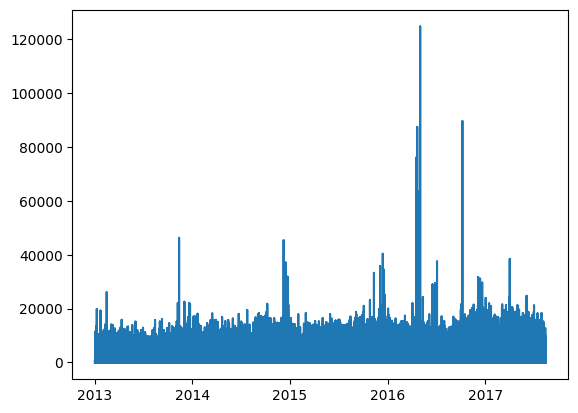

In [4]:
# We should check if the data is properly organized in time
plt.plot(Train_Data.date, Train_Data.sales);

In [5]:
#Make a copy of the dataframe for doing some manipulation
Train_Data_Copy = Train_Data.copy()

In [6]:
Train_Data_Copy.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
# We check if family is a string type
pd.api.types.is_string_dtype(Train_Data_Copy.family)

True

In [8]:
Train_Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [9]:
# Now we turn the family into categorical
Train_Data_Copy["family"]=Train_Data_Copy.family.astype("category").cat.as_ordered()

In [10]:
# Let us check if it was changed to categorical
Train_Data_Copy.family.dtype

CategoricalDtype(categories=['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
                  'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI',
                  'EGGS', 'FROZEN FOODS', 'GROCERY I', 'GROCERY II',
                  'HARDWARE', 'HOME AND KITCHEN I', 'HOME AND KITCHEN II',
                  'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR',
                  'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER',
                  'MAGAZINES', 'MEATS', 'PERSONAL CARE', 'PET SUPPLIES',
                  'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS',
                  'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'],
, ordered=True, categories_dtype=object)

In [11]:
Train_Data_Copy.family.cat.codes

0           0
1           1
2           2
3           3
4           4
           ..
3000883    28
3000884    29
3000885    30
3000886    31
3000887    32
Length: 3000888, dtype: int8

In [12]:
Train_Data_Copy.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [13]:
# Now let's split the date data for ientifying the patterns in data 
Train_Data_Copy["Year"] = Train_Data_Copy.date.dt.year
Train_Data_Copy["Quarter"] = Train_Data_Copy.date.dt.quarter
Train_Data_Copy["Month"] = Train_Data_Copy.date.dt.month
Train_Data_Copy["Day"] = Train_Data_Copy.date.dt.day
Train_Data_Copy["DayOfWeek"] = Train_Data_Copy.date.dt.dayofweek


In [14]:
# Let's drop the original date column
#Train_Data_Copy.drop(columns="date",inplace=True)

In [15]:
Train_Data_Copy.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Quarter,Month,Day,DayOfWeek
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,1


Now we need to enrich the data we have with the metadata availaable, i.e., holidays, store metadata, etc. 

### stores.csv 
* Store metadata, including city, state, type and cluster. 
* cluster is a grouping of similar stores.

### oil.csv
* Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

### holidays_events.csv
* Holidays and Events, with metadata
* NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
* Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

In [16]:
# Let's load the stores.csv file
Stores_Data = pd.read_csv('DATA/stores.csv',low_memory=False)
Stores_Data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [17]:
# Let's assign the values in the Train_Data_Copy
for S_nbr in Stores_Data.store_nbr.unique():
    Aux = Stores_Data[Stores_Data["store_nbr"]==S_nbr].copy()
    Aux.drop(columns="store_nbr",inplace=True)
    locs_S_nbr = Train_Data_Copy[Train_Data_Copy["store_nbr"]==S_nbr].index
    for Categories in Aux.columns:
        Train_Data_Copy.loc[locs_S_nbr,Categories] = np.full(len(locs_S_nbr),Aux[Categories].values)
    

In [18]:
Oil_Data = pd.read_csv("DATA/oil.csv",low_memory=False, parse_dates=["date"])
Index_True = Oil_Data[Oil_Data["dcoilwtico"].isna()==True].index
Oil_Data.drop(index=Index_True,inplace=True)
Oil_Data.head()

,date,dcoilwtico
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21


In [19]:
dates_oil =  (Oil_Data["date"] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'D');
date_train_data =  (Train_Data_Copy["date"] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'D');
Oil_Prices_aux = np.interp(date_train_data,dates_oil,Oil_Data["dcoilwtico"]);
Train_Data_Copy["dcoilwtico"] = Oil_Prices_aux

C:\Users\ccandelo\AppData\Local\Temp\ipykernel_10696\1968251879.py:1: UserWarning: no explicit representation of timezones available for np.datetime64
  dates_oil =  (Oil_Data["date"] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'D');
C:\Users\ccandelo\AppData\Local\Temp\ipykernel_10696\1968251879.py:2: UserWarning: no explicit representation of timezones available for np.datetime64
  date_train_data =  (Train_Data_Copy["date"] - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 'D');


Now we have our Data completed with all the prices filled (even the days that there was not information), we need just to reconvert object to categoricals and load the holidays events to complete the data structure. 

In [20]:
Train_Data_Copy["city"]=Train_Data_Copy.city.astype("category").cat.as_ordered()
Train_Data_Copy["state"]=Train_Data_Copy.state.astype("category").cat.as_ordered()
Train_Data_Copy["type"]=Train_Data_Copy.type.astype("category").cat.as_ordered()

In [21]:
Train_Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       category      
 4   sales        float64       
 5   onpromotion  int64         
 6   Year         int32         
 7   Quarter      int32         
 8   Month        int32         
 9   Day          int32         
 10  DayOfWeek    int32         
 11  city         category      
 12  state        category      
 13  type         category      
 14  cluster      float64       
 15  dcoilwtico   float64       
dtypes: category(4), datetime64[ns](1), float64(3), int32(5), int64(3)
memory usage: 229.0 MB


In [22]:
Train_Data_Copy.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Quarter,Month,Day,DayOfWeek,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14


Now we load the holidays to complete data

In [23]:
Holiday_Events_Data = pd.read_csv('DATA/holidays_events.csv',parse_dates=True)
Holiday_Events_Data.type.value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [24]:
# Let's fill the Holidays into the Training Data
Date_aux = Holiday_Events_Data.date.unique()
#Let's start everithing as Work Day
Train_Data_Copy["DayType"] = "Work Day"
Train_Data_Copy["locale"] = "National"
Train_Data_Copy["transferred"]=False
for ii in np.arange(0,len(Date_aux),1):
    locs_Train_Data = Train_Data_Copy[Train_Data_Copy["date"]==Date_aux[ii]].index
    locs_Holiday_Data = Holiday_Events_Data[Holiday_Events_Data["date"]==Date_aux[ii]].index 
    if not locs_Train_Data.empty:
        for jj in np.arange(0,len(locs_Holiday_Data),1):
            aux_item = Holiday_Events_Data.loc[locs_Holiday_Data[jj]].copy()
            if aux_item.locale=="National":
                Train_Data_Copy.loc[locs_Train_Data,"DayType"] = aux_item["type"]
                Train_Data_Copy.loc[locs_Train_Data,"locale"] = "National"
                Train_Data_Copy.loc[locs_Train_Data,"transferred"]=aux_item["transferred"]
            elif aux_item.locale=="Regional":
                locs_Train_Data_Regional = Train_Data_Copy[(Train_Data_Copy["date"]==Date_aux[ii]) & (Train_Data_Copy["state"]==aux_item["locale_name"])].index
                Train_Data_Copy.loc[locs_Train_Data_Regional,"DayType"] = aux_item["type"]
                Train_Data_Copy.loc[locs_Train_Data_Regional,"locale"] = "Regional"
                Train_Data_Copy.loc[locs_Train_Data_Regional,"transferred"]=aux_item["transferred"]
            elif aux_item.locale=="Local":
                locs_Train_Data_Local = Train_Data_Copy[(Train_Data_Copy["date"]==Date_aux[ii]) & (Train_Data_Copy["city"]==aux_item["locale_name"])].index
                Train_Data_Copy.loc[locs_Train_Data_Local,"DayType"] = aux_item["type"]
                Train_Data_Copy.loc[locs_Train_Data_Local,"locale"] = "Local"
                Train_Data_Copy.loc[locs_Train_Data_Local,"transferred"]=aux_item["transferred"]

In [25]:
Train_Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 19 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       category      
 4   sales        float64       
 5   onpromotion  int64         
 6   Year         int32         
 7   Quarter      int32         
 8   Month        int32         
 9   Day          int32         
 10  DayOfWeek    int32         
 11  city         category      
 12  state        category      
 13  type         category      
 14  cluster      float64       
 15  dcoilwtico   float64       
 16  DayType      object        
 17  locale       object        
 18  transferred  bool          
dtypes: bool(1), category(4), datetime64[ns](1), float64(3), int32(5), int64(3), object(2)
memory usage: 277.6+ MB


In [26]:
Train_Data_Copy["DayType"]=Train_Data_Copy.DayType.astype("category").cat.as_ordered()
Train_Data_Copy["locale"]=Train_Data_Copy.locale.astype("category").cat.as_ordered()

In [27]:
Train_Data_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 19 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       category      
 4   sales        float64       
 5   onpromotion  int64         
 6   Year         int32         
 7   Quarter      int32         
 8   Month        int32         
 9   Day          int32         
 10  DayOfWeek    int32         
 11  city         category      
 12  state        category      
 13  type         category      
 14  cluster      float64       
 15  dcoilwtico   float64       
 16  DayType      category      
 17  locale       category      
 18  transferred  bool          
dtypes: bool(1), category(6), datetime64[ns](1), float64(3), int32(5), int64(3)
memory usage: 237.5 MB


In [28]:
Train_Data_Copy2 = Train_Data_Copy.copy()
Train_Data_Copy2.head()

,id,date,store_nbr,family,sales,onpromotion,Year,Quarter,Month,Day,DayOfWeek,city,state,type,cluster,dcoilwtico,DayType,locale,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False


In [29]:
#Now the columns of id and date (original) are removed
Train_Data_Copy2.drop(columns=["id","date"],inplace=True)
Train_Data_Copy2.head()

,store_nbr,family,sales,onpromotion,Year,Quarter,Month,Day,DayOfWeek,city,state,type,cluster,dcoilwtico,DayType,locale,transferred
0,1,AUTOMOTIVE,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False
1,1,BABY CARE,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False
2,1,BEAUTY,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False
3,1,BEVERAGES,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False
4,1,BOOKS,0.0,0,2013,1,1,1,1,Quito,Pichincha,D,13.0,93.14,Holiday,National,False


In [30]:
# Due to A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. 
# People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.
# We remove this period as a outstanding phenomenon 
Index_2016_earthquake = Train_Data_Copy2[(Train_Data_Copy2["Year"]==2016) & (Train_Data_Copy2["Month"]>=4) & (Train_Data_Copy2["Month"]<6)].index
Index_2015_No_earthquake =Train_Data_Copy2[(Train_Data_Copy2["Year"]==2015) & (Train_Data_Copy2["Month"]>=4) & (Train_Data_Copy2["Month"]<6)].index
for column in Train_Data_Copy2.columns:
    Train_Data_Copy2.loc[Index_2016_earthquake,column] = Train_Data_Copy2.loc[Index_2015_No_earthquake,column].values


In [31]:
Train_Data_Copy2.loc[Index_2016_earthquake,"Year"] = int(2016)

In [32]:
Train_Data_Copy2.loc[Index_2016_earthquake]

,store_nbr,family,sales,onpromotion,Year,Quarter,Month,Day,DayOfWeek,city,state,type,cluster,dcoilwtico,DayType,locale,transferred
2108106,1,AUTOMOTIVE,2.000,0,2016,2,4,1,2,Quito,Pichincha,D,13.0,50.120000,Work Day,National,False
2108107,1,BABY CARE,0.000,0,2016,2,4,1,2,Quito,Pichincha,D,13.0,50.120000,Work Day,National,False
2108108,1,BEAUTY,1.000,0,2016,2,4,1,2,Quito,Pichincha,D,13.0,50.120000,Work Day,National,False
2108109,1,BEVERAGES,1057.000,1,2016,2,4,1,2,Quito,Pichincha,D,13.0,50.120000,Work Day,National,False
2108110,1,BOOKS,0.000,0,2016,2,4,1,2,Quito,Pichincha,D,13.0,50.120000,Work Day,National,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216803,9,POULTRY,819.234,1,2016,2,5,31,6,Quito,Pichincha,B,6.0,60.243333,Work Day,National,False
2216804,9,PREPARED FOODS,125.738,0,2016,2,5,31,6,Quito,Pichincha,B,6.0,60.243333,Work Day,National,False
2216805,9,PRODUCE,0.000,0,2016,2,5,31,6,Quito,Pichincha,B,6.0,60.243333,Work Day,National,False
2216806,9,SCHOOL AND OFFICE SUPPLIES,0.000,0,2016,2,5,31,6,Quito,Pichincha,B,6.0,60.243333,Work Day,National,False


In [33]:
Train_Data_Copy3 = Train_Data_Copy2.copy()
columns_categorical = Train_Data_Copy3.select_dtypes(['category']).columns
Train_Data_Copy3[columns_categorical] = Train_Data_Copy3[columns_categorical].apply(lambda x: x.cat.codes)

In [34]:
# TRAINING AND TEST DATA

# Training
X_Train_Data = Train_Data_Copy3[Train_Data_Copy3["Year"]<2017].copy()
y_Train_Data = X_Train_Data["sales"].copy()
X_Train_Data.drop(columns="sales",inplace=True)

# Test Data
X_Test_Data = Train_Data_Copy3[Train_Data_Copy3["Year"]==2017].copy()
y_Test_Data = X_Test_Data["sales"].copy()
X_Test_Data.drop(columns="sales",inplace=True)

In [43]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet

# Lasso ------------------------------------------------------------------
model_Lasso = Lasso(random_state=42) #loss="squared_error",penalty='l1',alpha=0.0001,l1_ratio=0.5,fit_intercept=True,max_iter=1000,tol=1e-3,shuffle=False,epsilon=0.1,eta0=0.01,random_state=1
model_Lasso.fit(X_Train_Data,y_Train_Data)
# ElasticNet -------------------------------------------------------------
model_ElasticNet = ElasticNet(random_state=42)
model_ElasticNet.fit(X_Train_Data,y_Train_Data)
# RandomForestRegressor --------------------------------------------------
modelRFR = RandomForestRegressor(n_jobs=-1,random_state=42)
modelRFR.fit(X_Train_Data,y_Train_Data)

CPU times: total: 50min 59s
Wall time: 2min 56s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [52]:
from sklearn.metrics import root_mean_squared_log_error as rmsle_skl
def rmsle(y_test,y_preds):
    n_test = len(y_test)
    msle = (np.sum((np.log(1+y_preds)-np.log(1+y_test))**2))/n_test
    score = np.sqrt(msle)
    return score

print(rmsle(y_Test_Data,modelRFR.predict(X_Test_Data)), rmsle_skl(y_Test_Data,modelRFR.predict(X_Test_Data)))

0.964992932980609 0.964992932980609


In [51]:
print(f"Lasso: {rmsle(y_Test_Data,model_Lasso.predict(X_Test_Data))}",f"ElasticNet: {rmsle(y_Test_Data,model_ElasticNet.predict(X_Test_Data))}",f"RandomForest: {rmsle(y_Test_Data,modelRFR.predict(X_Test_Data))}")

C:\Users\ccandelo\AppData\Local\Temp\ipykernel_10696\2018652089.py:3: RuntimeWarning: invalid value encountered in log
  msle = (np.sum((np.log(1+y_preds)-np.log(1+y_test))**2))/n_test
C:\Users\ccandelo\AppData\Local\Temp\ipykernel_10696\2018652089.py:3: RuntimeWarning: invalid value encountered in log
  msle = (np.sum((np.log(1+y_preds)-np.log(1+y_test))**2))/n_test


Lasso: 3.01075272376058 ElasticNet: 3.0882826108834287 RandomForest: 0.964992932980609


In [71]:
from sklearn.model_selection import GridSearchCV
rd_grid = {"n_estimators": np.arange(100,200,20),
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5,1,"sqrt","log2","auto"],
           "max_samples": [5000]}

GridSearchCV_model = GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1,random_state=42),param_grid=rd_grid,scoring='neg_root_mean_squared_log_error',cv=5,verbose=1,return_train_score=True)
# Training for Hyperparameters
X_Train_Data_GSCV = Train_Data_Copy3[Train_Data_Copy3["Year"]==2014].copy()
y_Train_Data_GSCV = X_Train_Data_GSCV["sales"].copy()
X_Train_Data_GSCV.drop(columns="sales",inplace=True)
X_Train_Data_GSCV

,store_nbr,family,onpromotion,Year,Quarter,Month,Day,DayOfWeek,city,state,type,cluster,dcoilwtico,DayType,locale,transferred
648648,1,0,0,2014,1,1,1,2,18,12,3,13.0,96.655,3,1,False
648649,1,1,0,2014,1,1,1,2,18,12,3,13.0,96.655,3,1,False
648650,1,2,0,2014,1,1,1,2,18,12,3,13.0,96.655,3,1,False
648651,1,3,0,2014,1,1,1,2,18,12,3,13.0,96.655,3,1,False
648652,1,4,0,2014,1,1,1,2,18,12,3,13.0,96.655,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297291,9,28,3,2014,4,12,31,2,18,12,1,6.0,53.450,0,1,False
1297292,9,29,0,2014,4,12,31,2,18,12,1,6.0,53.450,0,1,False
1297293,9,30,0,2014,4,12,31,2,18,12,1,6.0,53.450,0,1,False
1297294,9,31,0,2014,4,12,31,2,18,12,1,6.0,53.450,0,1,False


In [72]:
%%time
GridSearchCV_model.fit(X_Train_Data_GSCV,y_Train_Data_GSCV)

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits
[CV] END max_features=0.5, max_samples=5000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_features=0.5, max_samples=5000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_features=0.5, max_samples=5000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_features=0.5, max_samples=5000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_features=0.5, max_samples=5000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_features=0.5, max_samples=5000, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.4s
[CV] END max_features=0.5, max_samples=5000, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.5s
[CV] END max_features=0.5, max_samples=5000, min_samples_leaf=1, min_samp

KeyboardInterrupt: 

250.0